# Hangyakolónia algoritmus – gráfos gyakorló feladatok (sablon)

Ez a notebook **gyakorló feladatokhoz** készült.  
Ahol `TODO` jelölést látsz, ott neked kell megírni a kódot.

## 1. feladat (könnyű): Gráf reprezentáció és szomszédok

Reprezentáld a gráfot, majd írj `neighbors(node)` függvényt.

In [28]:
graph = {
    0: {1: 2.0, 2: 5.0, 3: 1.0},
    1: {0: 2.0, 2: 1.0, 4: 3.0},
    2: {0: 5.0, 1: 1.0, 3: 3.0, 5: 2.0},
    3: {0: 1.0, 2: 3.0, 4: 4.0, 5: 5.0},
    4: {1: 3.0, 3: 4.0, 5: 1.0},
    5: {2: 2.0, 3: 5.0, 4: 1.0}
}

def neighbors(node):
    """Visszaadja a node szomszédait és él-súlyait."""
    return graph.get(node, {})


## 2. feladat (könnyű): Heurisztika η_ij

Definiáld a heurisztikus értéket az élekre, pl. η_ij = 1 / distance.

In [29]:
def heuristic_eta(i, j, graph):
    distance = graph[i][j]
    return 1 / distance

## 3. feladat (közepes): Lépési valószínűségek

Számítsd ki p_ij^k értékeit a dián szereplő képlet alapján.

In [30]:
def transition_probabilities(i, tabu, tau, graph, alpha=0.5):
    """Visszaadja a lépési valószínűségeket."""
    probabilities = {}
    denominator = 0.0

    numerators = {}
    for j in graph.get(i, {}).keys():
        if j in tabu or j == i:
            continue

        eta = heuristic_eta(i, j, graph)
        tau_ij_val = tau.get(i, {}).get(j, 0.1)

        numerator = (alpha * tau_ij_val) + ((1 - alpha) * eta)
        numerators[j] = numerator

    denom = sum(numerators.values())

    if denom == 0:
        return {j: 0 for j in numerators}

    for j, num in numerators.items():
        probabilities[j] = num / denom

    return probabilities


## 4. feladat (közepes): Egy hangya útja

Építs fel egy hangya útvonalat start csúcsból, tabu listával.

In [31]:
import random

def construct_ant_solution(start_node, graph, tau, alpha=0.5):
    n = len(graph)
    tabu = {start_node}
    path = [start_node]
    current = start_node

    while len(tabu) < n:
        probs = transition_probabilities(current, tabu, tau, graph, alpha)

        if not probs:
            break

        nodes = list(probs.keys())
        weights = list(probs.values())

        if sum(weights) == 0:
            break

        next_node = random.choices(nodes, weights=weights, k=1)[0]

        path.append(next_node)
        tabu.add(next_node)
        current = next_node

    return path


## 5. feladat (közepes): Feromonfrissítés

Használd a τ_ij(t) = τ_ij(t-1) + Δτ_ij jellegű frissítést.

In [32]:
def update_pheromones_for_path(tau, path, Q=1.0):
    """Egyszerű feromonfrissítés egy adott útvonalra."""
    for a in range(len(path) - 1):
        i = path[a]
        j = path[a + 1]

        tau[i][j] += Q
        tau[j][i] += Q

    return tau

## 6. feladat (nehéz): Egyszerű ACO ciklus

Rakd össze egy egyszerű ACO fő ciklust több hangyával.

In [33]:
import random

def run_simple_aco(graph, n_ants=5, n_iters=20, alpha=0.5):
    nodes = list(graph.keys())
    n = len(nodes)

    tau = {i: {j: 0.1 for j in graph[i].keys()} for i in graph}
    for i in graph:
        for j in graph[i]:
            if j not in tau or i not in tau[j]:
                if j not in tau:
                    tau[j] = {}
                tau[j][i] = 0.1

    best_path = None
    best_length = float("inf")

    for iteration in range(n_iters):
        ant_paths = []
        ant_lengths = []

        for _ in range(n_ants):
            start = random.choice(nodes)
            path = construct_ant_solution(start, graph, tau, alpha)

            length = 0
            is_valid_path = True
            if len(path) == n:
                for a in range(len(path) - 1):
                    i_node = path[a]
                    j_node = path[a + 1]
                    if j_node not in graph[i_node]:
                        is_valid_path = False
                        break
                    length += graph[i_node][j_node]
            else:
                is_valid_path = False
                length = float('inf')

            if is_valid_path:
                ant_paths.append(path)
                ant_lengths.append(length)

        for p, L in zip(ant_paths, ant_lengths):
            if L < best_length:
                best_length = L
                best_path = p

        for path in ant_paths:
            update_pheromones_for_path(tau, path, Q=1.0)

        print(f"Iteráció {iteration+1}/{n_iters} - Legjobb hossz eddig: {best_length:.2f}")

    return best_path, best_length, tau

best_path, best_length, final_tau = run_simple_aco(graph, n_ants=5, n_iters=20, alpha=0.5)

print("\n=== ACO eredmény ===")
print("Legjobb útvonal:", best_path)
print("Legjobb hossz:", best_length)
print("Végső feromonmátrix:")
for i in final_tau:
    print(i, final_tau[i])


Iteráció 1/20 - Legjobb hossz eddig: 10.00
Iteráció 2/20 - Legjobb hossz eddig: 10.00
Iteráció 3/20 - Legjobb hossz eddig: 10.00
Iteráció 4/20 - Legjobb hossz eddig: 9.00
Iteráció 5/20 - Legjobb hossz eddig: 9.00
Iteráció 6/20 - Legjobb hossz eddig: 9.00
Iteráció 7/20 - Legjobb hossz eddig: 9.00
Iteráció 8/20 - Legjobb hossz eddig: 9.00
Iteráció 9/20 - Legjobb hossz eddig: 9.00
Iteráció 10/20 - Legjobb hossz eddig: 9.00
Iteráció 11/20 - Legjobb hossz eddig: 9.00
Iteráció 12/20 - Legjobb hossz eddig: 9.00
Iteráció 13/20 - Legjobb hossz eddig: 9.00
Iteráció 14/20 - Legjobb hossz eddig: 9.00
Iteráció 15/20 - Legjobb hossz eddig: 7.00
Iteráció 16/20 - Legjobb hossz eddig: 7.00
Iteráció 17/20 - Legjobb hossz eddig: 7.00
Iteráció 18/20 - Legjobb hossz eddig: 7.00
Iteráció 19/20 - Legjobb hossz eddig: 7.00
Iteráció 20/20 - Legjobb hossz eddig: 7.00

=== ACO eredmény ===
Legjobb útvonal: [3, 0, 1, 2, 5, 4]
Legjobb hossz: 7.0
Végső feromonmátrix:
0 {1: 52.1, 2: 28.1, 3: 42.1}
1 {0: 52.1, 2: 55.

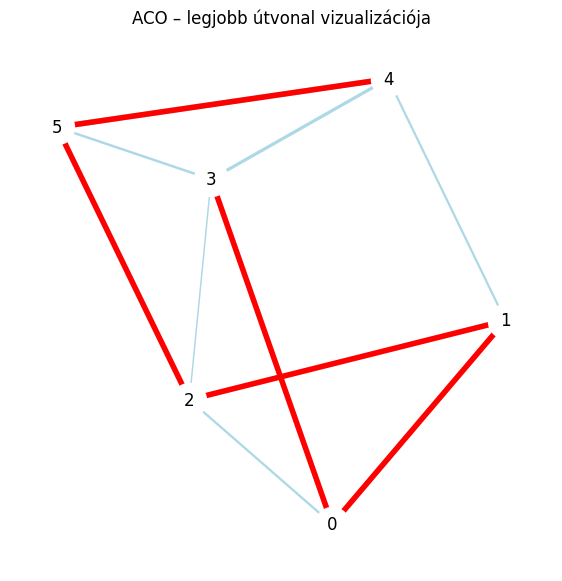

In [36]:
import matplotlib.pyplot as plt
import networkx as nx

G = nx.Graph()

for i in graph:
    for j, w in graph[i].items():
        G.add_edge(i, j, weight=w)
pos = nx.spring_layout(G, seed=42)
plt.figure(figsize=(7, 7))
max_tau = max(final_tau[i][j] for i in final_tau for j in final_tau[i])
edges = G.edges()

widths = [(final_tau[i][j] / max_tau) * 4 for i, j in edges]
nx.draw_networkx_edges(G, pos, width=widths, edge_color='lightblue')
nx.draw_networkx_nodes(G, pos, node_size=600, node_color="white")
nx.draw_networkx_labels(G, pos)

if best_path:
    path_edges = [(best_path[k], best_path[k+1]) for k in range(len(best_path)-1)]
    nx.draw_networkx_edges(G, pos, edgelist=path_edges,
                           width=4, edge_color='red')

plt.title("ACO – legjobb útvonal vizualizációja")
plt.axis("off")
plt.show()